# Data Visualisations Notebook

## Objectives

* Answer business requirement 1 
    * Second iteration of Data Visualisations
    * Identify features that are most correlated to sale price (including data that was originally categorical, that was not included in the correlation study in version 1 of this notebook.)
    * Generate data visualisations of correlated features against sale price.

## Inputs

* outputs/datasets/cleaned/house_prices_records_cleaned.csv

## Outputs

* Generate code that answers business requirement 1 by providing most relevant variables that correlate with sale price.
* Provide data visualisations for most relevant house atttributes, and provide conclusions based on the observed trends.

## Conclusions

* The following features have a strong positive correlation with sale price: {'1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd'}

## Additional Comments
This version uses a cleaned dataset as its input which allows data visualisations to be performed on all variables (except three that were dropped in data cleaning). This will give more valuable and comprehensive insights to answer the client's business requirement 1.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/cleaned/house_prices_records_cleaned.csv"))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,0,706,0,150,548,0,1710,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,1,978,1,284,460,0,1262,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,486,0,434,608,0,1786,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500


---

# Data Exploration

Generate pandas report to gain insights on dataset, including data types, missing data and distribution.

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations from pandas profile report
* The dataset has 21 variables (columns) and 1460 observations (rows).
* The dataset has only numeric variables.
* The data for sales price has a positively skewed distribution, with the majority of observations for sales prices in the range $130k to $214k (interquartile range). There is limited sales price data in the range from $350k+. It will be difficult to build a model that can accurately predict sale prices above $350k and this may be a problem for the client if any of their four inherited houses fall in this range, this is a potential limitation of the model and would need to be discussed with the client.

---

# Detailed Correlation Study

* We use the `.corr()` method with `spearman` to determine the top 10 variables most strongly correlated to SalePrice.
* The list is sliced at index 1 to exclude the first element because we don't want to include SalePrice v SalePrice.

In [7]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10) 
corr_spearman  

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.415906
Name: SalePrice, dtype: float64

* We use the `.corr()` method with `pearson` to determine the top 10 variables most strongly correlated to SalePrice.
* The list is sliced at index 1 to exclude the first element because we don't want to include SalePrice v SalePrice.

In [8]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10) 
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
BsmtFinSF1      0.386420
BsmtFinType1   -0.350962
Name: SalePrice, dtype: float64

* Moderate to very strong correlations were noticed with both Spearman and Pearson methods.
* We will consider only the variables that are strongly correlated with a value > 0.5 or < -0.5.
* We concatenate the strong variables list from spearman and pearson correlations. 'set' ensures each variable appears only once in the new list.

In [9]:
pearson_variables_strong = corr_pearson[(corr_pearson > 0.5) | (corr_pearson < -0.5)].index.tolist()
spearman_variables_strong = corr_spearman[(corr_spearman > 0.5) | (corr_spearman < -0.5)].index.tolist()

variables_with_strong_correlation = set(pearson_variables_strong + spearman_variables_strong)
variables_with_strong_correlation

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

We now have seven of the most important variables for predicting house sale price, all of which are strongly correlated to SalePrice. These are listed in alphabetical order, not order of importance.
* First floor area in square feet
* Garage area in square feet
* Above grade (ground) living area in square feet
* Overall quality of materials and finishes
* Total basement area in square feet
* Original construction date
* Year of remodelling (or build if it has not been remodelled)

In [10]:
vars_to_study = ['1stFlrSF',
                'GarageArea',
                'GrLivArea',
                'OverallQual',
                'TotalBsmtSF',
                'YearBuilt',
                'YearRemodAdd'] 
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

## Detailed Correlation and PPS Analysis

The following code taken from CI Churnometer project is designed to visualise the correlation and Predictive Power Score (PPS) matrices of the dataframe, in the following way:
* heatmap_corr: generates a heatmap to visualise the correlation matrix of the df. It masks values below a certain threshold and annotates the heatmap with correlation coefficients.
* heatmap_pps: generates a heatmap to visualise the PPS matrix of the df. It masks values below a certain threshold and annotates the heatmap with PPS scores.
* CalculateCorrAndPPS: calculates the Pearson and Spearman correlation matrices, as well as the PPS matrix of the input df.
* DisplayCorrAndPPS: displays the correlation matrices (Pearson and Spearman) and the PPS matrix using heatmaps.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Calculate Correlations and Power Predictive Score

In [12]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  420.0  0.034  0.076  0.0  0.0  0.0  0.028  0.579


* From the PPS interquartile range we can see the majority of values are between 0 and 0.028, which indicates there is a concentration of features with moderate predictive power.
* A maximum PPS score of 0.579 suggests that there is at least one feature in the dataset that has a moderate association with another feature. Note this figure is lower than the original ppscore (in 02_Data_Cleaning_v2) because the feature 'GarageYrBlt' has been dropped and this was strongly corrlated to 'YearBuilt'.
* A threshold of 0.2 was chosen to display features with low to moderate correlation or predictive power.

Generate heatmaps



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



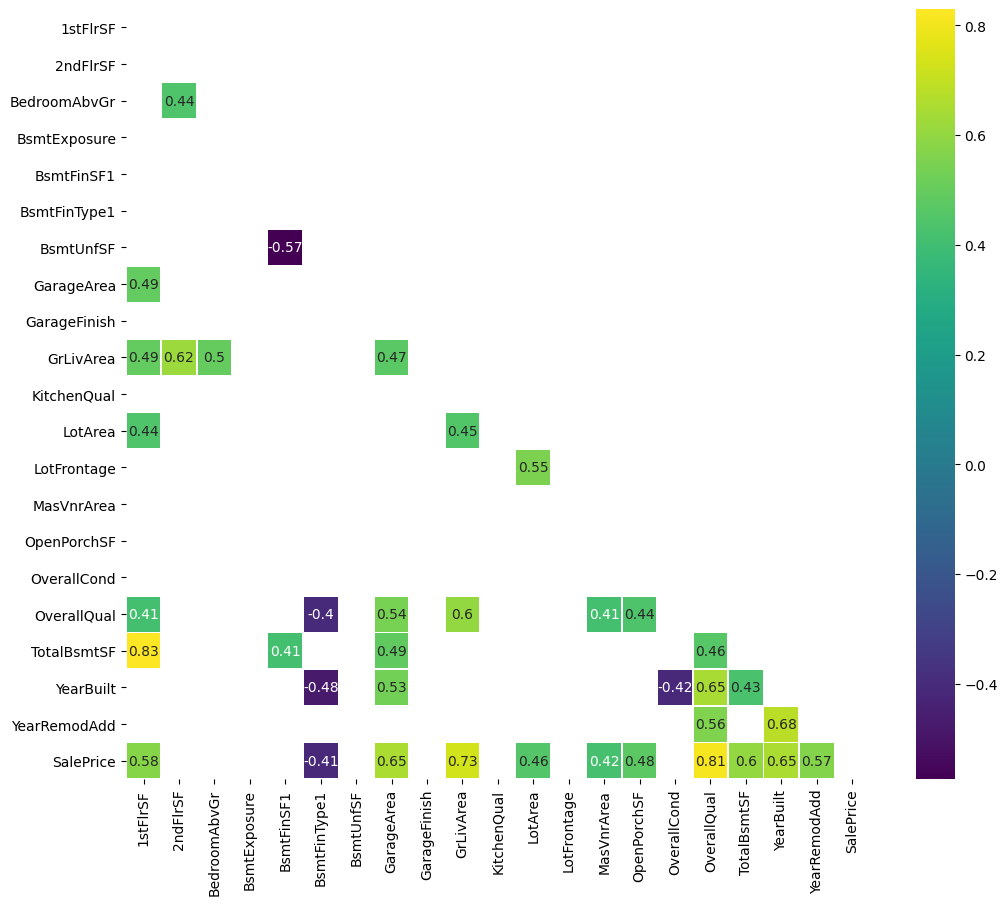



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



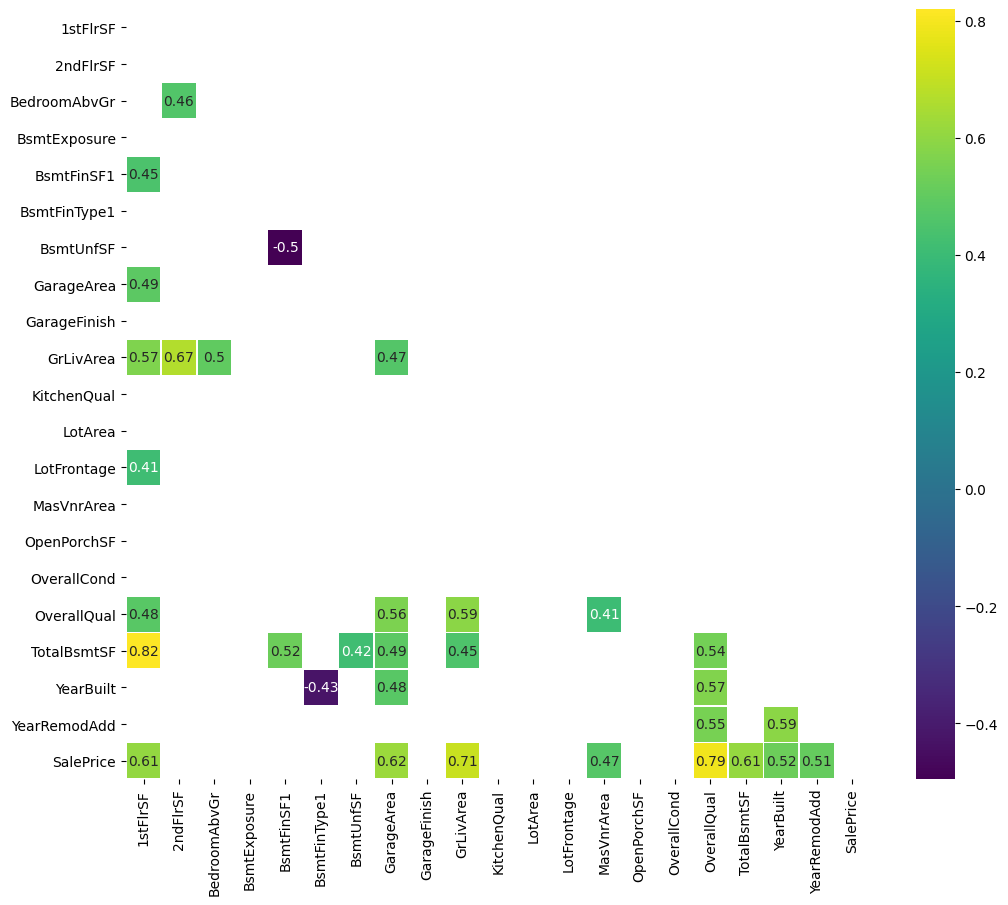



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



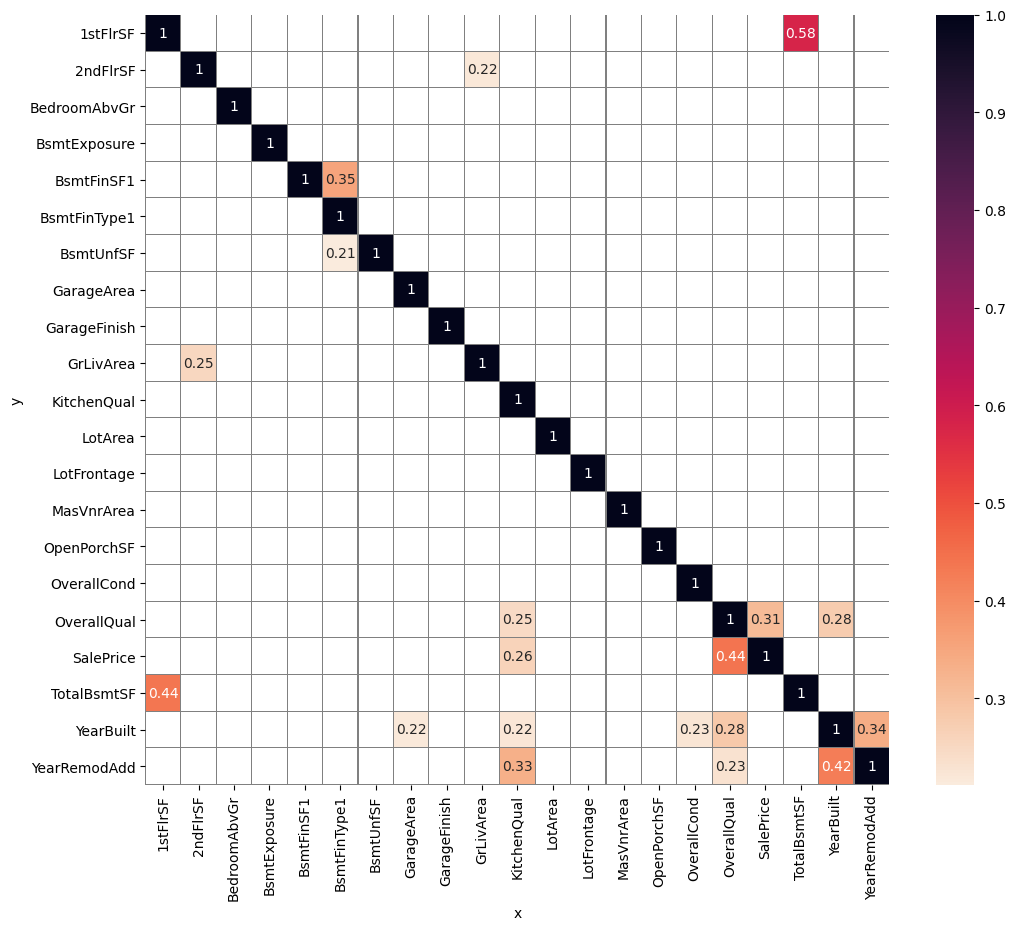

In [15]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

Observations from heatmap analyses:
* Sales price has moderate to strong monotonic relationship (Spearman correlation) with 11 house attributes.
* Sales price has moderate to strong linear relationship (Pearson correlation) with 8 house attributes.
* OverallQual and GrLivArea have the strongest predictive power for the target variable.
* Moderate multicollinearity correlations exist between several features, as expected.
* We accept the detailed correlation study as being appropriate to generate data visualisations for the client with cleaned data. 

# EDA on selected variables

Create a new dataframe with the only selected variables and SalePrice for exploratory data analysis (EDA).

In [17]:
df_eda = df.filter(vars_to_study + ['SalePrice']) 
df_eda.head(3)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,1710,7,856,2003,2003,208500
1,1262,460,1262,6,1262,1976,1976,181500
2,920,608,1786,7,920,2001,2002,223500


## Variables Distribution by Sale Price

* We plot the variables of interest against the SalePrice
* We use a linear regression model to add a line of best fit to the data

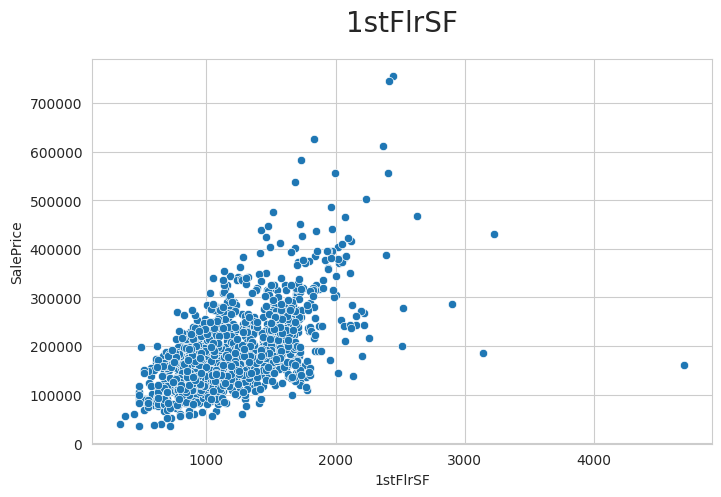

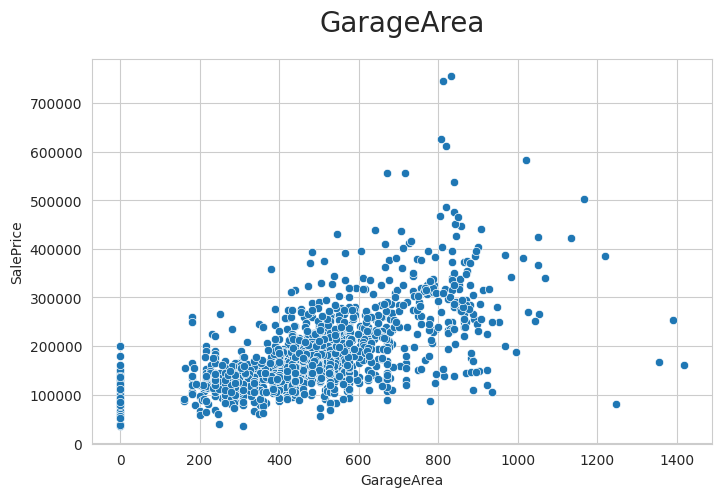

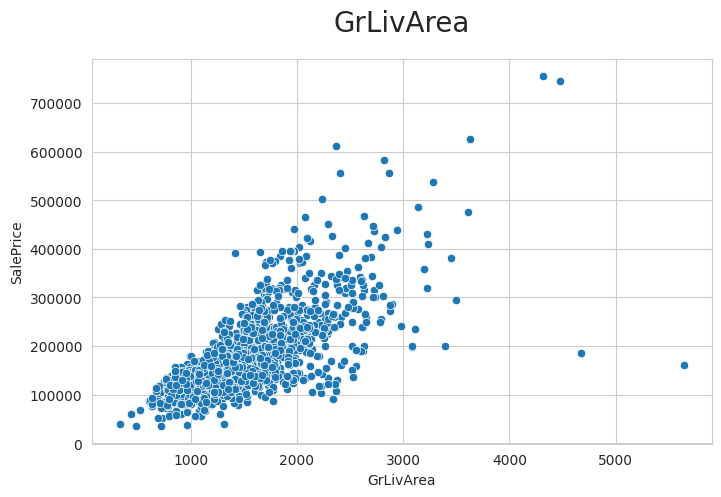

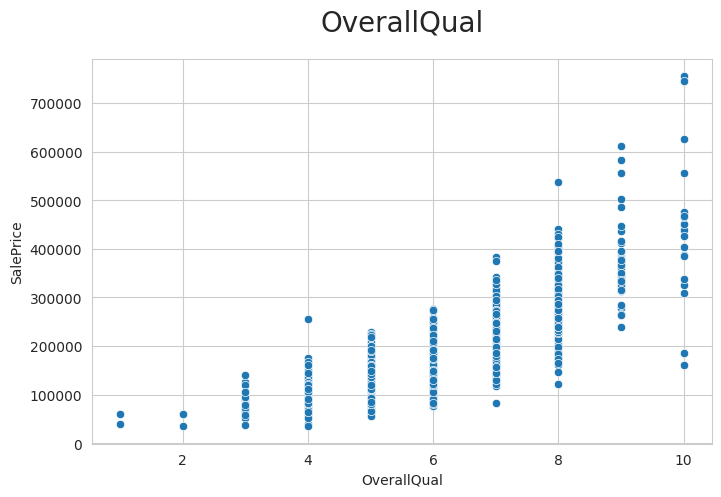

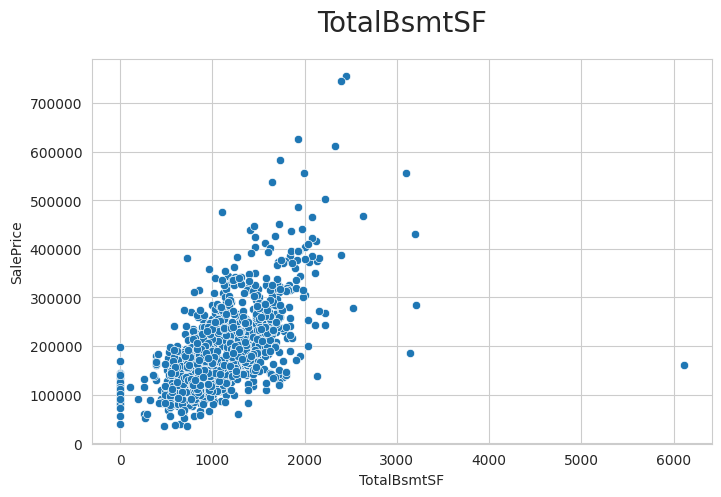

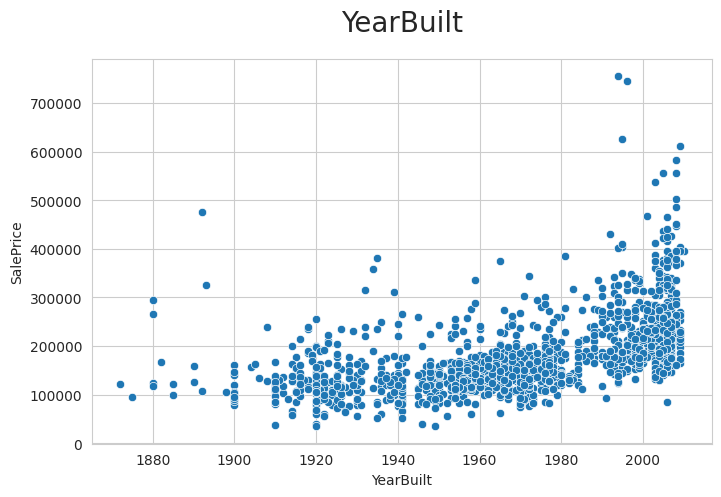

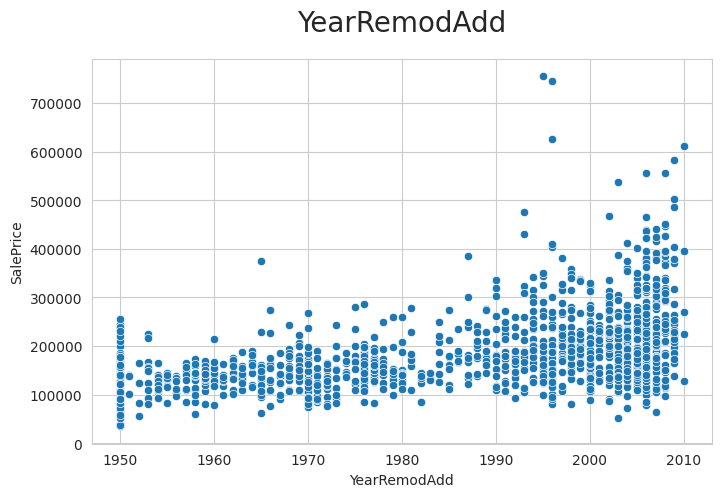

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_numerical(df_eda, col):
    """scatterplots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.scatterplot(data=df_eda, x=col, y=target_var)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")
plot_numerical(df_eda, vars_to_study)




## Generate bar plots based on most important features from correlation study

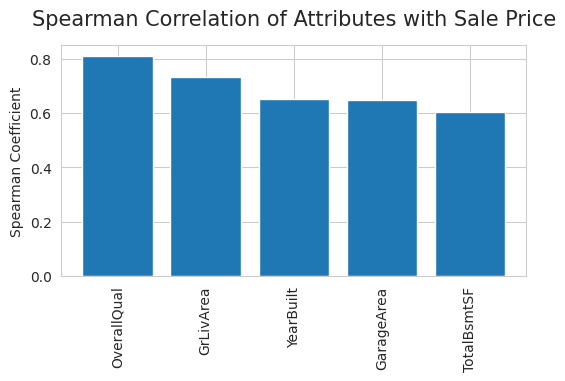

In [22]:
def display_spearman_corr_bar(df):
    """ Calcuate and display Spearman Correlation """
    corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(
        key=abs, ascending=False)[1:]
    fig, axes = plt.subplots(figsize=(6, 3))
    axes = plt.bar(x=corr_spearman[:5].index, height=corr_spearman[:5])
    plt.title(
        "Spearman Correlation of Attributes with Sale Price",
        fontsize=15, y=1.05
        )
    plt.xticks(rotation=90)
    plt.ylabel("Spearman Coefficient")
    plt.show

display_spearman_corr_bar(df)

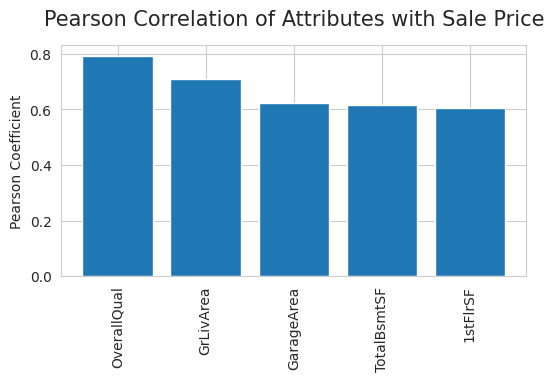

In [21]:
def display_pearson_corr_bar(df):
    """ Calcuate and display Pearson Correlation """
    corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(
        key=abs, ascending=False)[1:]
    fig, axes = plt.subplots(figsize=(6, 3))
    axes = plt.bar(x=corr_pearson[:5].index, height=corr_pearson[:5])
    plt.title(
        "Pearson Correlation of Attributes with Sale Price",
        fontsize=15, y=1.05
        )
    plt.xticks(rotation=90)
    plt.ylabel("Pearson Coefficient")
    plt.show

display_pearson_corr_bar(df)

# Conclusions

* Correlation heat maps have been generated with cleaned data. 
* Scatterplots have been made to allow the client to visualise how the most important house attributes correlate with sales price.
* Bar plots have been generated to show most correlated features from correlation study.

* The following variables have a moderate or strong positive correlation with sale price.
    * First floor area in square feet
    * Garage area in square feet
    * Above grade (ground) living area in square feet
    * Overall quality of materials and finishes
    * Total basement area in square feet
    * Original construction date
    * Year of remodelling (or build if it has not been remodelled)


## Next Steps
* Feature engineering - identify transformations to apply to specific variables, in preparation for ML modelling.